## Выбор локации для скважины

**Цель проекта** - выбрать регион для бурения новой скважины.

Предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Требуется построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски необходимо техникой *Bootstrap.*

## Содержание

[Загрузка и подготовка данных](#eda)

- [Удаление дубликатов](#del)
- [Анализ признаков](#an)
- [Корреляция признаков](#corr)

[Обучение и проверка модели](#model)

[Подготовка к расчёту прибыли](#profit)

[Расчёт прибыли и рисков](#risk)

[Основные результаты](#conclusion)

## Загрузка и подготовка данных <a name="eda"></a>

Импорт библиотек, которые потребуются для выполнения исследования:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

Загрузка датасетов:

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

---

Получение данных о первых пяти строках таблицы **geo_data_0**:

In [3]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Общая информация о данных таблицы **geo_data_0**:

In [4]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


В датафрейме **geo_data_0** представлена информация о признаках скважин, расположенных в первом регионе: 

- **id** — уникальный идентификатор скважины;
- **f0, f1, f2** — значимые признаки скважин;
- **product** — объём запасов в скважине (тыс. баррелей).

Общее количество объектов - 100 000. Пропусков нет. Все данные вещественного типа за исключением идентификатора скважин (он строкового типа).

---

Получение данных о первых пяти строках таблицы **geo_data_1**:

In [5]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Общая информация о данных таблицы **geo_data_1**:

In [6]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Датафрейм **geo_data_1** содержит данные о скважинах во втором регионе и идентичен по набору столбцов, количеству строк и типу данных датафрейму **geo_data_0**.

---

Получение данных о первых пяти строках таблицы **geo_data_2**:

In [7]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Общая информация о данных таблицы **geo_data_2**:

In [8]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Датафрейм **geo_data_2** содержит данные о скважинах в третьем регионе и идентичен по набору столбцов, количеству строк и типу двум другим датафреймам.

---

### Удаление дубликатов <a name="del"></a>

Проверим таблицы на наличие полностью повторяющихся строк:

In [9]:
print(geo_data_0.duplicated().sum())
print(geo_data_1.duplicated().sum())
print(geo_data_2.duplicated().sum())

0
0
0


Полных дубликатов в данных нет. 

### Анализ признаков <a name="an"></a>

Теперь рассмотрим отдельно каждый столбец на предмет наличия ошибок в данных, аномалий и пр. 

**id — уникальный идентификатор скважины**

In [10]:
print(geo_data_0['id'].duplicated().sum())
print(geo_data_1['id'].duplicated().sum())
print(geo_data_2['id'].duplicated().sum())

10
4
4


В датасетах находятся повторяющиеся идентификаторы, причем какие-то из признаков для них различаются, так как проверка выше показала, что полностью идентичных строк нет. Посмотрим на дубликаты в первом датафрейме:

In [11]:
dub_0 = geo_data_0[geo_data_0['id'].isin(geo_data_0['id'][geo_data_0['id'].duplicated()])].sort_values('id')
dub_0.head(10)

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


Признаки для одинаковых идентификаторов существенно различаются. Ошибки могли возникнуть в ходе сбора данных, или это просто опечатки. В любом случае, у нас нет данных, чтобы определить, какие данные некорректны. Общее число дубликатов - 20, что составляет всего 0,02% от общего количества строк, поэтому их можно удалить без последствий:

In [12]:
geo_data_0 = geo_data_0.query('id not in @dub_0.id')
geo_data_0.shape[0]

99980

Сделаем эту же операцию для двух других регионов:

In [13]:
dub_1 = geo_data_1[geo_data_1['id'].isin(geo_data_1['id'][geo_data_1['id'].duplicated()])].sort_values('id')
dub_2 = geo_data_2[geo_data_2['id'].isin(geo_data_2['id'][geo_data_2['id'].duplicated()])].sort_values('id')
geo_data_1 = geo_data_1.query('id not in @dub_1.id')
geo_data_2 = geo_data_2.query('id not in @dub_2.id')

**f0 - признак скважины**

In [14]:
regions = [geo_data_0, geo_data_1, geo_data_2]
ind = [1, 2, 3]

Посмотрим на параметры распределений и отразим их на графике:

In [15]:
for df, i in zip(regions, ind):
    print('Регион', i)
    display(df['f0'].describe())

Регион 1


count    99980.000000
mean         0.500447
std          0.871879
min         -1.408605
25%         -0.072674
50%          0.502374
75%          1.073692
max          2.362331
Name: f0, dtype: float64

Регион 2


count    99992.000000
mean         1.141363
std          8.965805
min        -31.609576
25%         -6.298525
50%          1.153190
75%          8.620964
max         29.421755
Name: f0, dtype: float64

Регион 3


count    99992.000000
mean         0.001975
std          1.732061
min         -8.760004
25%         -1.162328
50%          0.009411
75%          1.158442
max          7.238262
Name: f0, dtype: float64

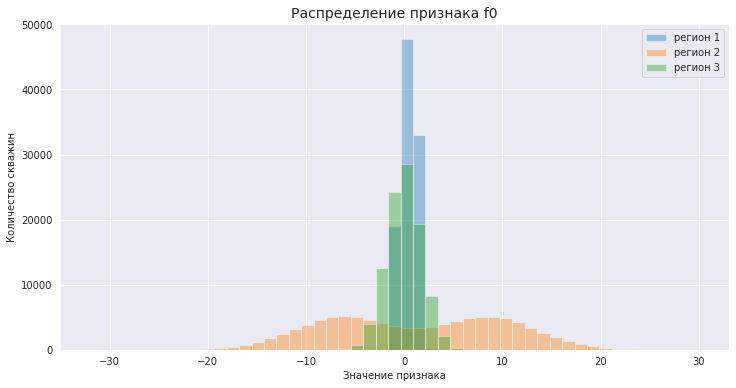

In [16]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
fig1 = sns.distplot(geo_data_0['f0'], kde = False, \
                    bins = np.linspace(start = -32, stop = 30, num = 50), label = 'регион 1') 
fig2 = sns.distplot(geo_data_1['f0'], kde = False, \
                    bins = np.linspace(start = -32, stop = 30, num = 50), label = 'регион 2') 
fig3 = sns.distplot(geo_data_2['f0'], kde = False, \
                    bins = np.linspace(start = -32, stop = 30, num = 50), label = 'регион 3')  
fig2.set_title("Распределение признака f0", fontsize = 14)
fig2.set_ylabel("Количество скважин", fontsize = 10)
fig2.set_xlabel("Значение признака")
plt.legend()
plt.show()

Для региона 1 значения признака **f0** наиболее скучены: распределены от -1,41 до 2,36; среднее 0,50 совпадает с медианой, стандартное отклонение 0,87. 

Для региона 2 характерен максимальный разброс: от -31,61 до 29,42. Среднее - 1,14, медиана - 1,15, стандартное отклонение - 8,96. На графике видим два "колокола" - один возле абсциссы -6, другой - около 9,5.

Распределение для региона 3 выглядит как нормальное. Минимум составляет -8,76, максимум - 7,24. Среднее и медиана - 0. Стандартное отклонение - 1,73.

**f1 - признак скважины**

Рассмотрим распределения:

In [17]:
for df, i in zip(regions, ind):
    print('Регион', i)
    display(df['f1'].describe())

Регион 1


count    99980.000000
mean         0.250147
std          0.504431
min         -0.848218
25%         -0.200869
50%          0.250252
75%          0.700646
max          1.343769
Name: f1, dtype: float64

Регион 2


count    99992.000000
mean        -4.796522
std          5.119934
min        -26.358598
25%         -8.267985
50%         -4.813005
75%         -1.332704
max         18.734063
Name: f1, dtype: float64

Регион 3


count    99992.000000
mean        -0.002113
std          1.730404
min         -7.084020
25%         -1.174820
50%         -0.009580
75%          1.163592
max          7.844801
Name: f1, dtype: float64

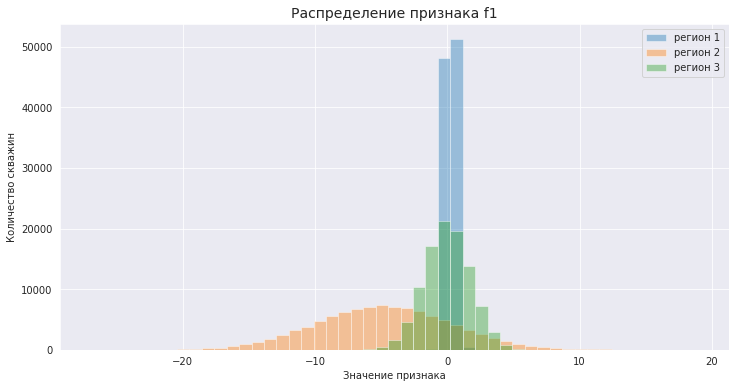

In [18]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
fig1 = sns.distplot(geo_data_0['f1'], kde = False, \
                    bins = np.linspace(start = -27, stop = 19, num = 50), label = 'регион 1') 
fig2 = sns.distplot(geo_data_1['f1'], kde = False, \
                    bins = np.linspace(start = -27, stop = 19, num = 50), label = 'регион 2') 
fig3 = sns.distplot(geo_data_2['f1'], kde = False, \
                    bins = np.linspace(start = -27, stop = 19, num = 50), label = 'регион 3')  
fig2.set_title("Распределение признака f1", fontsize = 14)
fig2.set_ylabel("Количество скважин", fontsize = 10)
fig2.set_xlabel("Значение признака")
plt.legend()
plt.show()

Для признака **f1** прослеживаются похожие закономерности:

Наименьший диапазон значений характерен для региона 1: от -0,85 до 1,34; среднее 0,25 совпадает с медианой, стандартное отклонение 0,50.

Напротив, для региона 2 разброс максимален: от -26,35 до 18,73. Среднее составляет -4,79, медиана равна -4,81, стандартное отклонение - 5,11. На этот раз на графике только один "колокол". Распределение выглядит похожим на нормальное.

Распределение для региона 3 также выглядит как нормальное. Минимум составляет -7,08, максимум - 7,84. Среднее и медиана - 0. Стандартное отклонение - 1,73. Распределение выглядит как нормальное.

**f2 - признак скважины**

Рассмотрим распределения:

In [19]:
for df, i in zip(regions, ind):
    print('Регион', i)
    display(df['f2'].describe())

Регион 1


count    99980.000000
mean         2.502638
std          3.248056
min        -12.088328
25%          0.288010
50%          2.516005
75%          4.714884
max         16.003790
Name: f2, dtype: float64

Регион 2


count    99992.000000
mean         2.494511
std          1.703587
min         -0.018144
25%          1.000021
50%          2.011475
75%          3.999904
max          5.019721
Name: f2, dtype: float64

Регион 3


count    99992.000000
mean         2.495088
std          3.473491
min        -11.970335
25%          0.130269
50%          2.484236
75%          4.858662
max         16.739402
Name: f2, dtype: float64

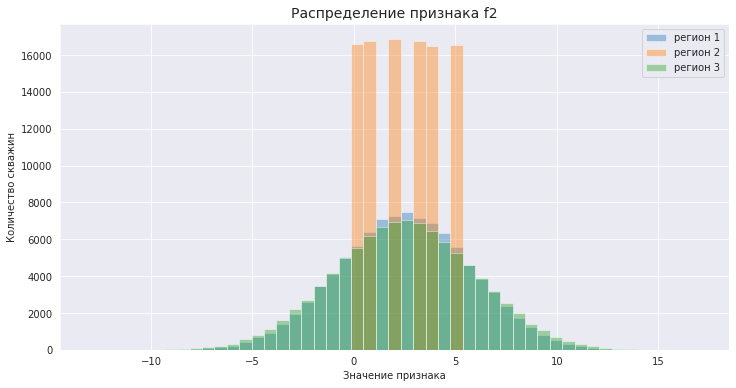

In [20]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
fig1 = sns.distplot(geo_data_0['f2'], kde = False, \
                    bins = np.linspace(start = -13, stop = 17, num = 50), label = 'регион 1') 
fig2 = sns.distplot(geo_data_1['f2'], kde = False, \
                    bins = np.linspace(start = -13, stop = 17, num = 50), label = 'регион 2') 
fig3 = sns.distplot(geo_data_2['f2'], kde = False, \
                    bins = np.linspace(start = -13, stop = 17, num = 50), label = 'регион 3')  
fig2.set_title("Распределение признака f2", fontsize = 14)
fig2.set_ylabel("Количество скважин", fontsize = 10)
fig2.set_xlabel("Значение признака")
plt.legend()
plt.show()

Распределения признака **f2** для регионов 1 и 3 выглядят практически идентично: разброс значений примерно от -12 до 17, среднее и медиана - 2,5, стандартное отклонение около 3,3.

Значения для региона 2 распределены вокруг шести точек: 

In [21]:
geo_data_1['f2'].round(1).value_counts()

 2.0    16860
 1.0    16774
 3.0    16749
-0.0    16571
 5.0    16536
 4.0    16502
Name: f2, dtype: int64

**product — объём запасов в месторождении (тыс. баррелей)**

Рассмотрим распределения:

In [22]:
for df, i in zip(regions, ind):
    print('Регион', i)
    display(df['product'].describe())

Регион 1


count    99980.000000
mean        92.499166
std         44.289044
min          0.000000
25%         56.496513
50%         91.847928
75%        128.564089
max        185.364347
Name: product, dtype: float64

Регион 2


count    99992.000000
mean        68.824148
std         45.944889
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: product, dtype: float64

Регион 3


count    99992.000000
mean        94.998767
std         44.747763
min          0.000000
25%         59.450441
50%         94.925026
75%        130.585544
max        190.029838
Name: product, dtype: float64

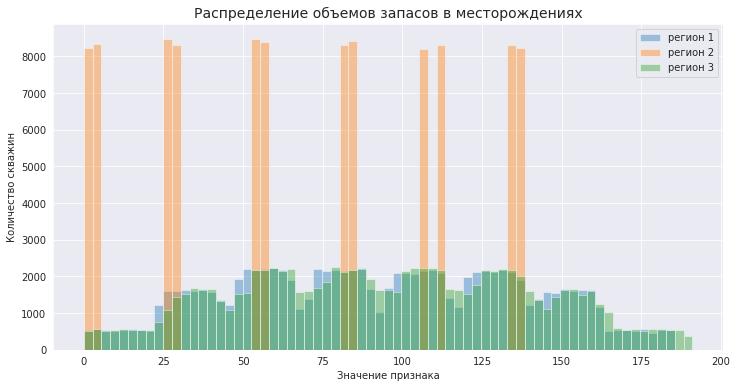

In [23]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
fig1 = sns.distplot(geo_data_0['product'], kde = False, \
                    bins = np.linspace(start = 0, stop = 191, num = 70), label = 'регион 1') 
fig2 = sns.distplot(geo_data_1['product'], kde = False, \
                    bins = np.linspace(start = 0, stop = 191, num = 70), label = 'регион 2') 
fig3 = sns.distplot(geo_data_2['product'], kde = False, \
                    bins = np.linspace(start = 0, stop = 191, num = 70), label = 'регион 3')  
fig2.set_title("Распределение объемов запасов в месторождениях", fontsize = 14)
fig2.set_ylabel("Количество скважин", fontsize = 10)
fig2.set_xlabel("Значение признака")
plt.legend()
plt.show()

Вновь распределения выглядят похоже для регионов 1 и 3: разброс значений от 0 до 190, среднее и медиана около в диапазоне 92-94, стандартное отклонение - 44.

Значения для региона 2 распределены вокруг двенадцати точек: 

In [24]:
geo_data_1['product'].round(1).value_counts()

53.9     8472
27.0     8468
84.0     8430
57.1     8388
3.2      8336
80.9     8319
30.1     8306
134.8    8303
111.0    8302
0.0      8235
137.9    8233
107.8    8200
Name: product, dtype: int64

### Корреляция признаков <a name="corr"></a>

Проверим, есть ли среди признаков коллинеарные. Построим для каждого региона парные графики и матрицу корреляции:

Регион 1


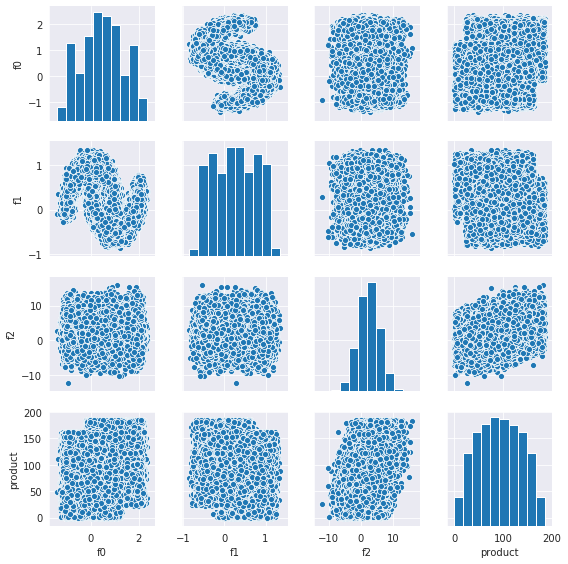

Регион 2


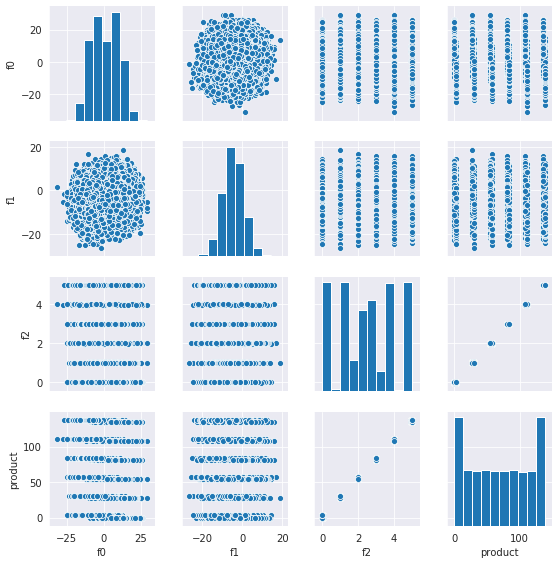

Регион 3


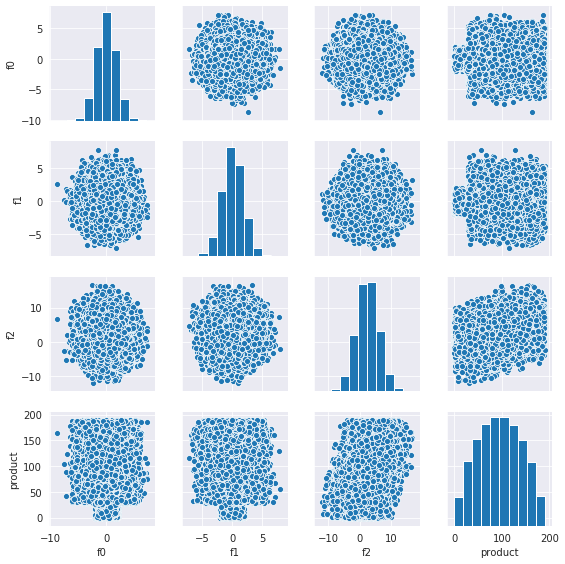

In [25]:
for df, i in zip(regions, ind):
    print('Регион', i)
    sns.pairplot(df, height = 2)
    plt.show()

Для региона 1 мы видим нелинейную зависимость признаков **f0** и **f1**, а также линейную между признаками **f2** и **product**.

Для региона 2 очевидна линейная зависимость признаков **f2** и **product**. Возможно, имеется нелинейная зависимость признаков **f0** и **f1**

Для региона 3 также прослеживается линейная взаимосвязь признаков **f2** и **product**. 

Матрицы корреляции подтверждают сделанные выводы:

Регион 1


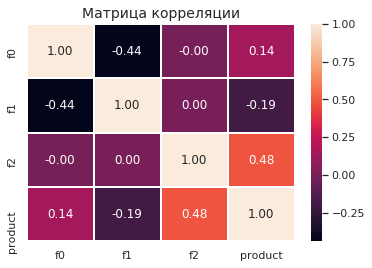

Регион 2


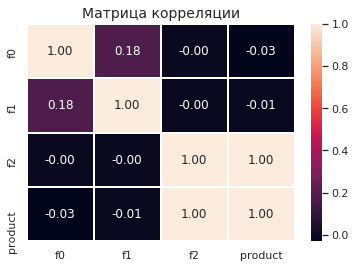

Регион 3


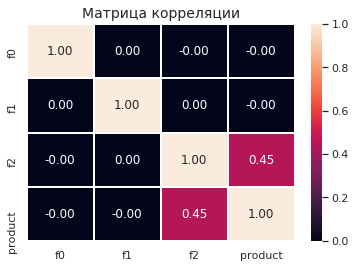

In [26]:
for df, i in zip(regions, ind):
    print('Регион', i)
    sns.set(style = 'white')
    plt.figure(figsize = (6, 4))
    plt.title('Матрица корреляции', fontsize = 14)
    ax = sns.heatmap(df.corr(), annot = True, linewidths = 1, linecolor = 'white', fmt = '.2f')
    plt.show()

### Вывод <a name="conc_eda"></a>

Данные подготовлены к анализу:

- удалено 36 дубликатов (0,012% от общего числа строк);
- пропущенных значений и аномалий не обнаружено;
- проведен исследовательский анализ каждого признака в разрезе регионов:
    - средние значения признака **f0** для всех регионов близки (от 0 до 1). Однако в регионе 1 практически нет разброса значений (стандартное отклонение 0,87), в регионе 3 он выше (стандартное отклонение 1,73), и максимален в регионе 2 (стандартное отклонение 8,96);
    - средние значения признака **f1** почти одинаковы для регионов 1 и 3 (около 0). Стандартное отклонение минимально в регионе 1 (0,5) и максимально для региона 2 (5,11).
    - распределения признака **f2** для регионов 1 и 3 выглядят практически идентично: разброс значений примерно от -12 до 17, среднее - 2,5. Значения для региона 2 распределены вокруг шести точек (0, 1, 2, 3, 4, 5).
    - распределения признака **product** выглядят похоже для регионов 1 и 3: разброс значений от 0 до 190, среднее в диапазоне 92-94. Значения для региона 2 распределены вокруг двенадцати точек: (0, 3, 27, 30, 54, 57, 81, 84, 108, 111, 135, 138).
- рассчитаны коэффициенты корреляции между переменными в разрезе регионов:
    - во всех регионах существует линейная зависимость признаков **f2** и **product**. Для регионов 1 и 2 также характерна нелинейная зависимость признаков **f0** и **f1** (для региона 1 в большей степени).

## Обучение и проверка модели <a name="model"></a>

Напишем функцию, которая обучает модель и проверяет ее работу. По условию требуется модель линейной регрессии.

In [27]:
'''
Функция получает на вход набор признаков (целевой отдельно), делит выборку на обучающую и валидационную в отношении 75:25, 
обучает модель линейной регрессии, выводит среднее значение предсказаний на валидационной выборке и RMSE,
а также записывает в результат правильные ответы и предсказания на валидационной выборке.

'''

def lin_reg(features, target):

    features_train, features_valid, target_train, target_valid = \
                                    train_test_split(features, target, test_size = 0.25, random_state = 12345) 

    model = LinearRegression() 
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid) 

    result_mean = round(predictions_valid.mean(), 5)
    result_mse = round((mean_squared_error(target_valid, predictions_valid))**0.5, 5)
    print("Средний запас сырья на валидационной выборке:", result_mean)
    print("RMSE модели линейной регрессии на валидационной выборке:", result_mse)
    return target_valid.reset_index(drop = True), pd.Series(predictions_valid)

Прежде чем применять функцию к имеющимся датафреймам, удалим не нужную для прогнозирования переменную **id**:

In [28]:
for df in regions:
    df = df.drop('id', axis = 1, inplace = True)  

Теперь отделим целевой признак:

In [29]:
features = []
target = []

for df, i in zip(regions, ind):
    features.append(df.drop('product', axis = 1))
    target.append(df['product'])

Применим функцию к данным по каждому региону:

In [30]:
targ_valid = []
pred_valid = []
res = []

for i in range(3):
    print('Регион', i)
    res.append(lin_reg(features[i], target[i]))
    targ_valid.append(res[i][0])
    pred_valid.append(res[i][1])
    print('')

Регион 0
Средний запас сырья на валидационной выборке: 92.42384
RMSE модели линейной регрессии на валидационной выборке: 37.7169

Регион 1
Средний запас сырья на валидационной выборке: 68.98312
RMSE модели линейной регрессии на валидационной выборке: 0.89149

Регион 2
Средний запас сырья на валидационной выборке: 95.11622
RMSE модели линейной регрессии на валидационной выборке: 39.97554



### Вывод <a name="conc_model"></a>

Максимальный средний запас сырья модель линейной регрессии предсказала для региона 3: 95,11 тыс. баррелей. Чуть ниже результат для региона 1 - 92,42 тыс. баррелей. Заметно хуже регион 2 - всего 68,98 тыс. баррелей.

При этом метрика RMSE (корень из среднеквадратичной ошибки) для региона 2 минимальна - всего 0,89. Для первого и третьего региона она в десятки раз выше - 37,7 и 40 соответственно. Таким образом, для региона 2 предсказания модели будут значительно точнее.

## Подготовка к расчёту прибыли <a name="profit"></a>

Сохраним константы, заданные по условию, в отдельных переменных:

In [31]:
budget = 10**10 # общий бюджет на разработку
profit_per_unit = 450000 # доход с каждой тысячи баррелей 
num_of_wells = 500 # количество скважин для исследования 
num_of_best_wells = 200 # количество выбираемых скважин для разработки
probability_loss = 0.025 # максимально допустимая вероятность убытков
num_bootstrap_samples = 1000 # количество выборок, используемых в bootstrap для нахождения распределения прибыли
conf_interval = 0.95 # доверительный интервал для средней прибыли

Рассчитаем объём сырья для безубыточной разработки новой скважины. В точке безубыточности общий бюджет на разработку равен доходу с единицы продукта, умноженному на сумму запасов в каждой из разрабатываемых скважин. Таких скважин по условию 200 штук. Если предположить, что в каждой скважине одинаковый объем нефти, то минимальный средний объем сырья в одной скважине составит 111,11 тыс. баррелей:

In [32]:
min_product = round(budget / (profit_per_unit * 200), 2)
print('Минимальный средний объем сырья в новой скважине, тыс. баррелей', min_product)

Минимальный средний объем сырья в новой скважине, тыс. баррелей 111.11


### Вывод <a name="conc_profit"></a>

В предыдущем пункте спрогнозированный лучший средний запас сырья составил 95,11 тыс. баррелей (для региона 3), что на 16 тыс. баррелей меньше требуемого для выхода на безубыточность. Однако разброс значений признака **product** достаточно большой: максимальные объемы - 185, 137, 190 тыс. баррелей соответственно для регионов 1, 2 и 3. Возможно, компании удастся выйти на прибыль, выбрав скважины с максимальными запасами.

## Расчёт прибыли и рисков <a name="risk"></a>

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

In [33]:
'''
На входе:
    target - истинные значения объемов скважин
    predictions - список предсказаний
    wells_total - количество скважин для исследования
    wells_num_best - число отбираемых скважин
    prof_per_unit - доход с единицы продукта
    budg - бюждет на разработку
    state - параметр для генерации псевдослучайных чисел
    replace - выбираются ли элементы с возвращением
    
Функция выбирает из выборки с предсказаниями случайным образом число скважин = wells_total, 
отбирает среди них число wells_num_best лучших и считает прибыль в млрд р. по истинным значениям объемов.

'''

state = 12345
def profit(target, predictions, wells_total, wells_num_best, prof_per_unit, budg, state, replace = False):
    
    sample_pred = predictions.sample(n = wells_total, replace = replace, random_state = state)
    best_pred = sample_pred.sort_values(ascending = False).head(wells_num_best)
    target_sorted = target[best_pred.index]
    result = round((target_sorted.sum() * prof_per_unit - budg) / 10**9, 5)
    
    return result 

Проверка работы функции:

In [34]:
for i in ind:
    print('Регион', i)
    print('Ожидаемая прибыль:', 
          profit(targ_valid[i - 1], pred_valid[i - 1], num_of_wells, num_of_best_wells, 
                 profit_per_unit, budget, state), 'млрд р.')
    print('')

Регион 1
Ожидаемая прибыль: 0.72705 млрд р.

Регион 2
Ожидаемая прибыль: 0.13385 млрд р.

Регион 3
Ожидаемая прибыль: 0.22971 млрд р.



Поскольку 500 точек для исследования выбираются случайно, получившийся результат может существенно меняться при другом наборе скважин. Применим технику *Bootstrap* на большом количестве выборок, чтобы найти распределение прибыли, и построим доверительный интервал.

In [35]:
'''
На входе:
    target - истинные значения объемов скважин
    predictions - список предсказаний
    wells_total - количество скважин для исследования
    wells_num_best - число отбираемых скважин
    prof_per_unit - доход с единицы продукта
    budg - бюждет на разработку
    state - параметр для генерации псевдослучайных чисел
    prob_loss - максимально допустимая вероятность убытков
    n_bootstrap_samp - количество выборок, используемых в bootstrap для нахождения распределения прибыли
    conf_int - доверительный интервал для средней прибыли
    
Функция рассчитывает и выводит оценку средней прибыли, доверительный интервал для нее, а также риск убытков. 
Внутри используется написанная выше функция profit.

'''

def risk(target, predictions, wells_total, wells_num_best, prof_per_unit, budg, state, 
              prob_loss, n_bootstrap_samp, conf_int):

    alpha = 1 - conf_int
    bootstr_profit = []
    state = np.random.RandomState(12345)
    
    for _ in range(n_bootstrap_samp):
        profits = profit(target, predictions, num_of_wells, num_of_best_wells, 
                 profit_per_unit, budget, state, replace = True)
        bootstr_profit.append(profits)

    bootstr_profit = pd.Series(bootstr_profit)
    bootstr_profit_mean = round(bootstr_profit.mean(), 5)
    conf_int_left = round(bootstr_profit.quantile(alpha / 2), 5)
    conf_int_right = round(bootstr_profit.quantile(1 - alpha / 2), 5)
    
    count = 0
    for prof in bootstr_profit :
        if prof < 0 :
            count += 1
    loss_prob = count / n_bootstrap_samp
    
    print('Средняя прибыль:', bootstr_profit_mean, 'млрд р.') 
    print('95%-й доверительный интервал: [', conf_int_left, ', ', conf_int_right, '] млрд р.', sep = '')
    print('Вероятность убытков: ', loss_prob)


In [36]:
for i in ind:
    print('Регион', i)
    risk(targ_valid[i - 1], pred_valid[i - 1], num_of_wells, num_of_best_wells, profit_per_unit, 
                 budget, state, probability_loss, num_bootstrap_samples, conf_interval)
    print('')

Регион 1
Средняя прибыль: 0.43154 млрд р.
95%-й доверительный интервал: [-0.08093, 0.94104] млрд р.
Вероятность убытков:  0.055

Регион 2
Средняя прибыль: 0.47795 млрд р.
95%-й доверительный интервал: [0.05174, 0.89795] млрд р.
Вероятность убытков:  0.02

Регион 3
Средняя прибыль: 0.32215 млрд р.
95%-й доверительный интервал: [-0.17347, 0.84353] млрд р.
Вероятность убытков:  0.123



### Вывод <a name="conc_risk"></a>

Нефтяной компании следует остановиться на разработке скважин в регионе 2:

- во-первых, это единственный регион, удовлетворяющий условию получения вероятности убытков не более 2,5% (показатель составляет 2%); 
- во-вторых, только для региона 2 95%-й доверительный интервал целиком лежит в положительной части;
- наконец, средняя прибыль в этом регионе максимальна (0,478 млрд рублей).

## Основные результаты <a name="conclusion"></a>

В работе решалась задача выбора географического региона для бурения нефтяных скважин и прогнозирования средней прибыли добывающей компании.

В ходе предварительного анализа признаков были получены следующие выводы:

- для регионов 1 и 3 распределения признаков **f2** и **product** похожи (близки средние, стандартные отклонения, диапазон значений);
- для регионов 1 и 3 практически совпадают средние значения признаков **f0** и **f1**, однако для региона 1 меньше дисперсия;
- распределение всех четырех признаков существенно отличается для региона 2;
- во всех регионах существует линейная зависимость признаков **f2** и **product**. Для регионов 1 и 2 также характерна нелинейная зависимость признаков **f0** и **f1** (для региона 1 в большей степени).

Для решения задачи прогнозирования использовалась модель линейной регрессии как самая предсказуемая. Исходные данные были разбиты на обучающую и валидационную выборки в пропорции 75:25 соответственно. 

Максимальный средний запас сырья модель линейной регрессии предсказала для региона 3 - 95,11 тыс. баррелей. Близкий результат получился для региона 1 - 92,42 тыс. баррелей. Заметно ниже оказался средний запас в регионе 2 - всего 68,98 тыс. баррелей.

При этом метрика RMSE (корень из среднеквадратичной ошибки) для региона 2 оказалась минимальна - всего 0,89. Для первого и третьего региона она в десятки раз выше - 37,7 и 40 соответственно. Таким образом, для региона 2 предсказания модели значительно точнее.

Согласно расчетам, для выхода на безубыточность компании при бюджете 10 млрд рублей и доходе 450 рублей за 1 баррель нефти требуется, чтобы минимальный средний объем сырья в новой скважине был не менее 111,11 тыс. баррелей. Однако разброс значений признака **product** достаточно большой: максимальные объемы составляют 185, 137, 190 тыс. баррелей соответственно для регионов 1, 2 и 3. Для оценки того, удастся ли компании выйти на прибыль, выбрав скважины с максимальными запасами, использовалась техника *Bootstrap*.

При моделировании процесса разведки случайным образом выбиралось 500 точек, из которых для разработки оставлялось 200 с максимальными объемами нефти. Новые выборки формировались 1000 раз. По каждому региону было получено среднее значение прибыли, для него рассчитан 95%-й доверительный интервал, а также оценена вероятность убытков

По итогам проведенного анализа предлагается выбрать для разработки регион 2 по следующим причинам:

- это единственный регион, удовлетворяющий условию получения вероятности убытков не более 2,5% (показатель составляет 2%); 
- только для региона 2 95%-й доверительный интервал целиком лежит в положительной части;
- средняя прибыль в этом регионе максимальна (0,478 млрд рублей).